In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

# IO utils


In [2]:
def read_omg_csv(path_palm_data: str, 
                 n_omg_channels: int, 
                 n_acc_channels: int = 0, 
                 n_gyr_channels: int = 0, 
                 n_mag_channels: int = 0, 
                 n_enc_channels: int = 0,
                 button_ch: bool = True, 
                 sync_ch: bool = True, 
                 timestamp_ch: bool = True) -> pd.DataFrame:
    
    '''
    Reads CSV data for OMG data
    NB: data must be separated by " " separator

        Parameters:
                path_palm_data  (str): path to csv data file
                n_omg_channels  (int): Number of OMG channels
                n_acc_channels  (int): Number of Accelerometer channels, default = 0
                n_gyr_channels  (int): Number of Gyroscope channels, default = 0
                n_mag_channels  (int): Number of Magnetometer channels, default = 0
                n_enc_channels  (int): Number of Encoder channels, default = 0
                button_ch      (bool): If button channel is present, default = True
                sync_ch        (bool): If synchronization channel is present, default = True
                timestamp_ch   (bool): If timestamp channel is present, default = True

        Returns:
                df_raw (pd.DataFrame): Parsed pandas Dataframe with OMG data
    '''
    
    df_raw = pd.read_csv(path_palm_data, sep=' ', 
                         header=None, 
                         skipfooter=1, 
                         skiprows=1, 
                         engine='python')
    columns = np.arange(n_omg_channels).astype('str').tolist()
    
    for label, label_count in zip(['ACC', 'GYR', 'MAG', 'ENC'], 
                                  [n_acc_channels, n_gyr_channels, n_mag_channels, n_enc_channels]):
        columns = columns + ['{}{}'.format(label, i) for i in range(label_count)]
        
    if button_ch:
        columns = columns + ['BUTTON']
        
    if sync_ch:
        columns = columns + ['SYNC']
        
    if timestamp_ch:
        columns = columns + ['ts']
        
    df_raw.columns = columns
    
    return df_raw

# Abbreviations
OMG — optomiography  
ACC — accelerometer  
GYR — gyroscope  
ENC - encoders (fingers of prosthesis or gloves)  
model — model of data  

# Data

In [3]:
palm_file = './sprint2_pilote1_gestures.palm'
gestures = read_omg_csv(palm_file, 
                              n_omg_channels=50,
                              n_acc_channels=3, 
                              n_gyr_channels=3, 
                              n_enc_channels=6, 
                              n_mag_channels=0)

print(gestures.shape)
gestures.head()

(37610, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
0,10,8,29,2846,2929,2873,2598,24,8,6,...,32,37,50,54,44,5,0,0,0,1174956
1,10,8,28,2846,2931,2873,2597,24,8,13,...,31,37,50,54,44,5,0,0,0,1174989
2,16,8,29,2847,2930,2875,2598,24,8,6,...,31,37,50,54,44,5,0,0,0,1175022
3,10,8,29,2847,2930,2875,2598,25,8,5,...,30,37,50,54,44,5,0,0,0,1175055
4,0,8,29,2845,2927,2870,2594,24,8,6,...,30,37,50,54,44,5,0,0,0,1175088


In [4]:
# [X features] '0', ..., '49' - каналы OMG датчиков
#              'ACC0', 'ACC1', 'ACC2' - акселерометр (потенциально могут использоваться как факторы для модели)
#              'GYR0', 'GYR1', 'GYR2' - гироскоп     (потенциально могут использоваться как факторы для модели)
# [y target]   'ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5' - координаты пальцев в перчатке GLOVE
# 'BUTTON' - не используется
# 'SYNC' - синхронизация данных с протоколом
# 'ts' - метка времени
gestures.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0', 'ENC1',
       'ENC2', 'ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'],
      dtype='object')

In [5]:
OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
# ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
GLOVE_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']

assert len(OMG_CH)+len(ACC_CH)+len(GYR_CH)+len(GLOVE_CH)+len(BUTTON_SYNC_TS_CH) == gestures.shape[-1]

print(f"OMG_CH: {list(OMG_CH)}")
print(f"ACC_CH: {list(ACC_CH)}")
print(f"GYR_CH: {list(GYR_CH)}")
print(f"GLOVE_CH: {list(GLOVE_CH)}")
print(f"BUTTON_SYNC_TS_CH: {list(BUTTON_SYNC_TS_CH)}")

OMG_CH: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']
ACC_CH: ['ACC0', 'ACC1', 'ACC2']
GYR_CH: ['GYR0', 'GYR1', 'GYR2']
GLOVE_CH: ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH: ['BUTTON', 'SYNC', 'ts']


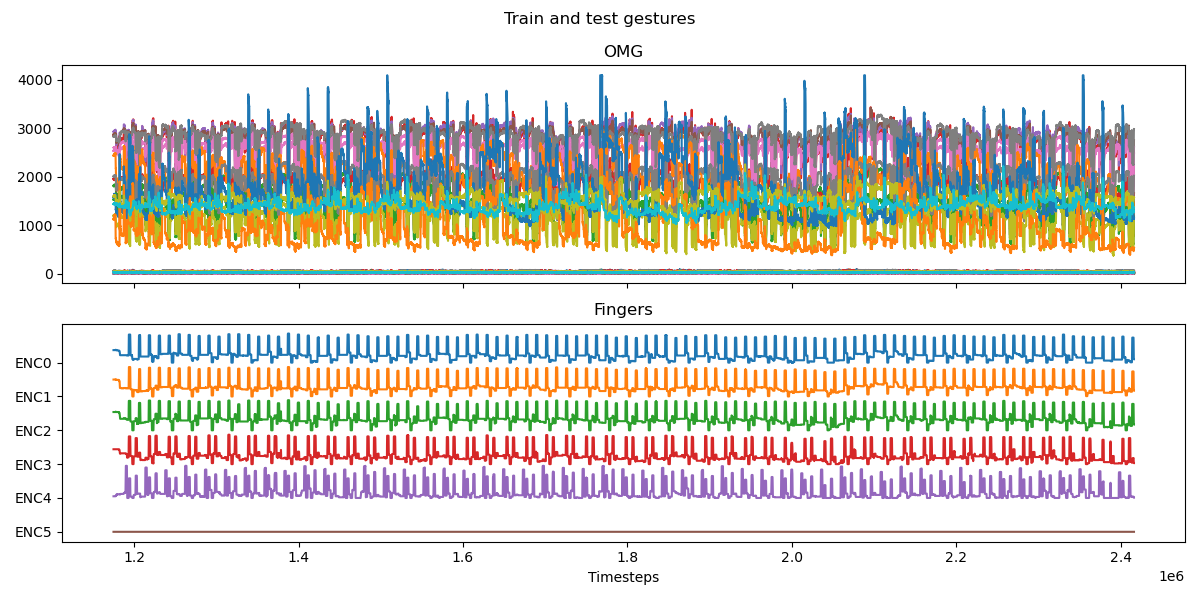

In [6]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plot_train = plt.plot(gestures['ts'].values, gestures[OMG_CH].values)
plt.title('OMG')

plt.sca(axx[1])
plot_train = plt.plot(gestures['ts'].values, gestures[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 100)
plt.yticks(-np.arange(len(GLOVE_CH)) * 100, GLOVE_CH)
plt.title('Fingers')
plt.xlabel('Timesteps')

plt.suptitle('Train and test gestures')
plt.tight_layout()

### Protocol

In [7]:
gestures_protocol = pd.read_csv(f'{palm_file}.protocol.csv')
gestures_protocol.head(10)

,epoch,Thumb,Index,Middle,Ring,Pinky,Thumb_stretch,Index_stretch,Middle_stretch,Ring_stretch,Pinky_stretch,Pronation
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
8,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
9,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5


In [8]:
# add OPEN to protocol
mask_open = (gestures_protocol[['Thumb_stretch', 'Index_stretch', 'Middle_stretch', 'Ring_stretch', 'Pinky_stretch']] == 1.0).all(axis=1)
gestures_protocol.loc[mask_open, ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']] = -0.5

In [9]:
gestures_ext = pd.merge(
    gestures,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

In [10]:
gestures_ext.isna().sum().unique()

array([0])

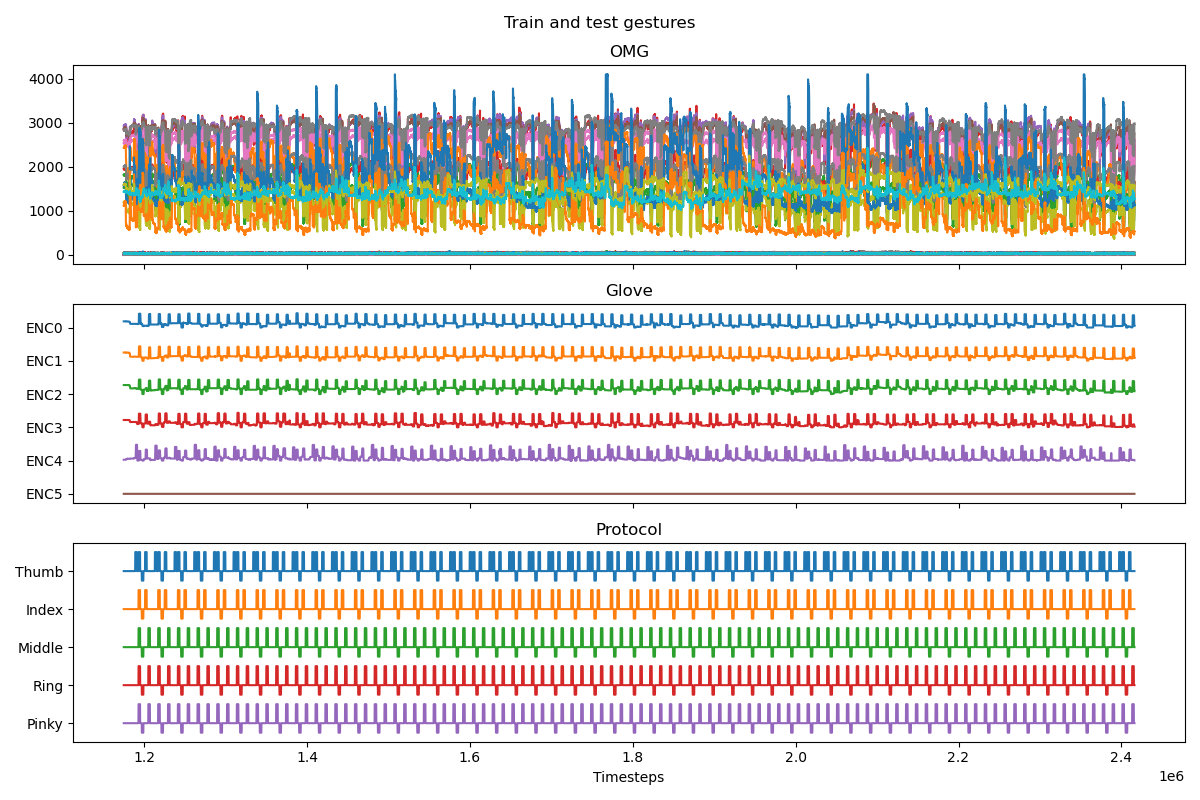

In [11]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])
plot_train = plt.plot(gestures_ext['ts'].values, gestures_ext[OMG_CH].values)
plt.title('OMG')

plt.sca(axx[1])
plot_train = plt.plot(gestures_ext['ts'].values, gestures_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200)
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.title('Glove')

plt.sca(axx[2])

plot_train = plt.plot(
    gestures_ext['ts'].values,
    gestures_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(5) * 2
)

plt.yticks(-np.arange(5) * 2, ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
plt.xlabel('Timesteps')
plt.title('Protocol')

plt.suptitle('Train and test gestures')
plt.tight_layout()

# Preprocessing

In [12]:
# TODO

# Dataset forming

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

X_train = gestures[OMG_CH].values
# X_train = scaler.fit_transform(X_train)
y_train = gestures[GLOVE_CH].values / 100

X_train.shape, y_train.shape

((37610, 50), (37610, 6))

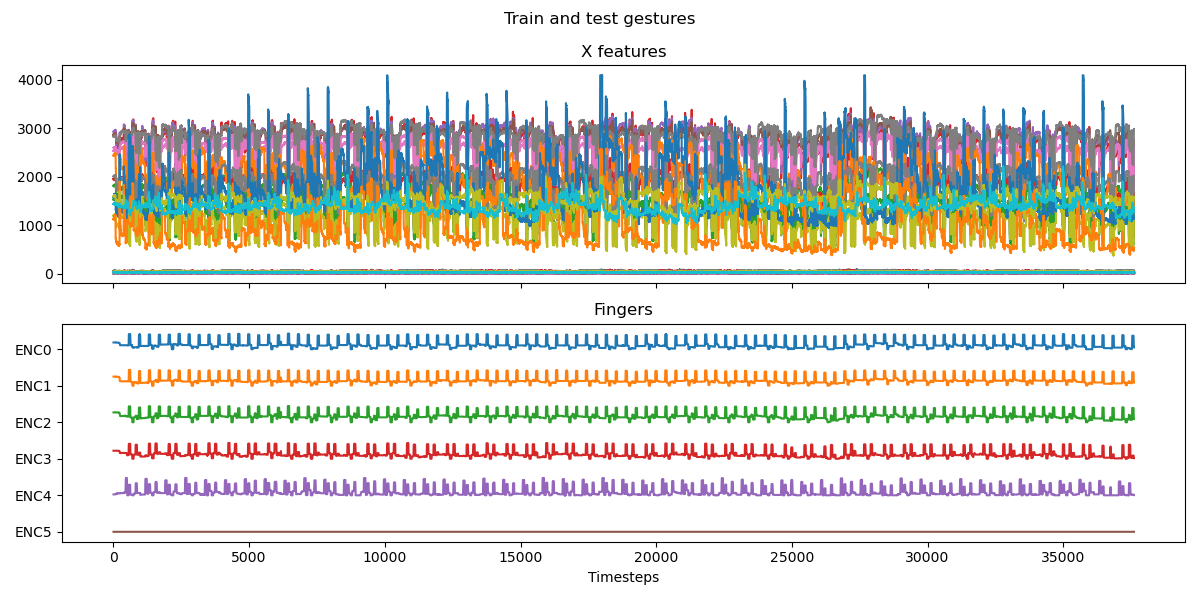

In [14]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plt.plot(X_train)
plt.title('X features')

plt.sca(axx[1])
plt.plot(y_train - np.arange(len(GLOVE_CH)) * 2)
plt.yticks(-np.arange(len(GLOVE_CH)) * 2, GLOVE_CH)
plt.title('Fingers')
plt.xlabel('Timesteps')

plt.suptitle('Train and test gestures')
plt.tight_layout()

In [15]:
import tensorflow as tf
    
duration = 100
ts_events = np.arange(0, len(X_train), 20)

X_train_nn = [X_train[ts_event : ts_event + duration] for ts_event in ts_events]
y_train_nn = [y_train[ts_event : ts_event + duration] for ts_event in ts_events]

X_train_nn = np.array([arr for arr in X_train_nn if arr.shape == X_train_nn[0].shape])
y_train_nn = np.array([arr for arr in y_train_nn if arr.shape == y_train_nn[0].shape])

print(X_train_nn.shape, y_train_nn.shape)

2023-05-15 12:39:23.607848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1876, 100, 50) (1876, 100, 6)


# Modeling

## Architecture

In [16]:
hidden_size = 100
_, n_timesteps, n_channels = X_train_nn.shape
output_units = y_train_nn.shape[-1]
print(f"input_shape = {(n_timesteps, n_channels)} | output_units = {output_units}")

input_channels = x = tf.keras.layers.Input(shape=(None, n_channels))

x = tf.keras.layers.SimpleRNN( # 
    units=hidden_size,
    activation='relu',
    # recurrent_regularizer=tf.keras.regularizers.L1L2(l1=1e-3, l2=1e-3),
    return_sequences=True,
)(x)
output = tf.keras.layers.TimeDistributed(
    tf.keras.layers.Dense(
        units=output_units,
        activation='sigmoid',
    ),
)(x)

model = tf.keras.Model(
    inputs=input_channels,
    outputs=output,
    name="Model"
)

model.summary()

input_shape = (100, 50) | output_units = 6
Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 50)]        0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 100)         15100     
                                                                 
 time_distributed (TimeDistr  (None, None, 6)          606       
 ibuted)                                                         
                                                                 
Total params: 15,706
Trainable params: 15,706
Non-trainable params: 0
_________________________________________________________________


## Model train

In [17]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    loss="mse",
    metrics=[Precision(name='precision'), Recall(name='recall')],
    optimizer=tf.keras.optimizers.Adam(),
)

history = model.fit(
    X_train_nn,
    y_train_nn, 
    epochs=50,
    validation_split=0.2,
    verbose=1,
)

y_pred_train_nn = model.predict(X_train_nn)
print(y_pred_train_nn.shape)

Epoch 1/50
47/47 [==============================] - 1s 16ms/step - loss: 0.2143 - precision: 0.8379 - recall: 0.2111 - val_loss: 0.1910 - val_precision: 0.9400 - val_recall: 0.2064
Epoch 2/50
47/47 [==============================] - 1s 13ms/step - loss: 0.1911 - precision: 0.9321 - recall: 0.2020 - val_loss: 0.1909 - val_precision: 0.9401 - val_recall: 0.2063
Epoch 3/50
47/47 [==============================] - 1s 13ms/step - loss: 0.1911 - precision: 0.9321 - recall: 0.2020 - val_loss: 0.1909 - val_precision: 0.9401 - val_recall: 0.2066
Epoch 4/50
47/47 [==============================] - 1s 12ms/step - loss: 0.1911 - precision: 0.9321 - recall: 0.2020 - val_loss: 0.1909 - val_precision: 0.9401 - val_recall: 0.2063
Epoch 5/50
47/47 [==============================] - 1s 12ms/step - loss: 0.1911 - precision: 0.9321 - recall: 0.2020 - val_loss: 0.1909 - val_precision: 0.9401 - val_recall: 0.2063
Epoch 6/50
47/47 [==============================] - 1s 12ms/step - loss: 0.1910 - precision: 0.

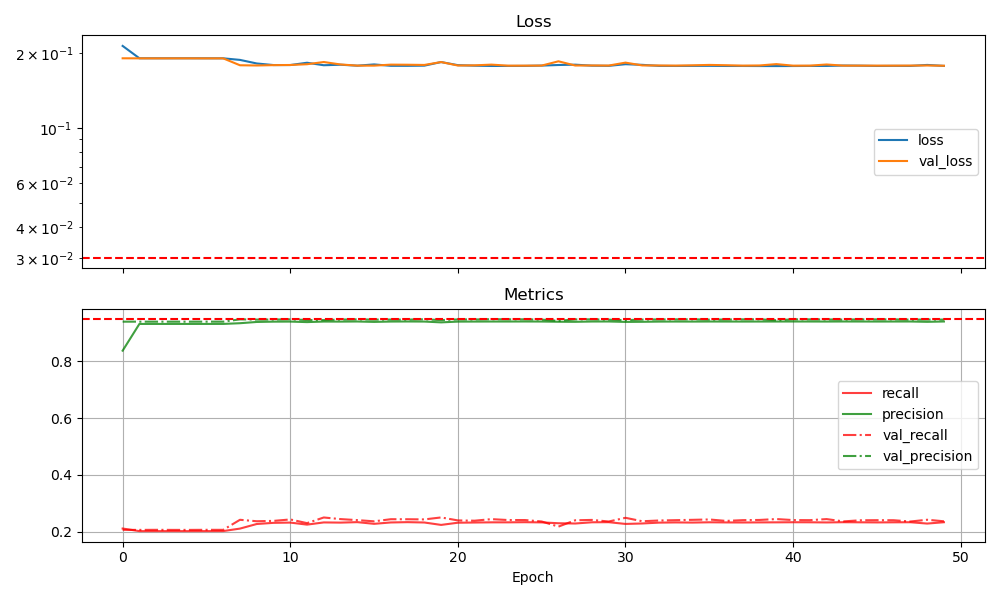

In [18]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
plt.sca(axx[0])
plt.plot(history.history['loss'],     label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.axhline(0.03, color='r', ls='--')
plt.yscale('log')
plt.title('Loss')
plt.legend()

plt.sca(axx[1])
plt.plot(history.history['recall'],    c='r', alpha=0.75, label='recall')
plt.plot(history.history['precision'], c='g', alpha=0.75, label='precision')
# plt.plot(history.history['accuracy'],  c='b', alpha=0.75, label='accuracy')
plt.plot(history.history['val_recall'],    '-.', c='r', alpha=0.75, label='val_recall')
plt.plot(history.history['val_precision'], '-.', c='g', alpha=0.75, label='val_precision')
# plt.plot(history.history['val_accuracy'],  '-.', c='b', alpha=0.75, label='val_accuracy')
plt.grid()
plt.axhline(0.95, color='r', ls='--')
# plt.ylim(0.6, 1.0)
# plt.yscale('log')
plt.title('Metrics')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

## Visualisation

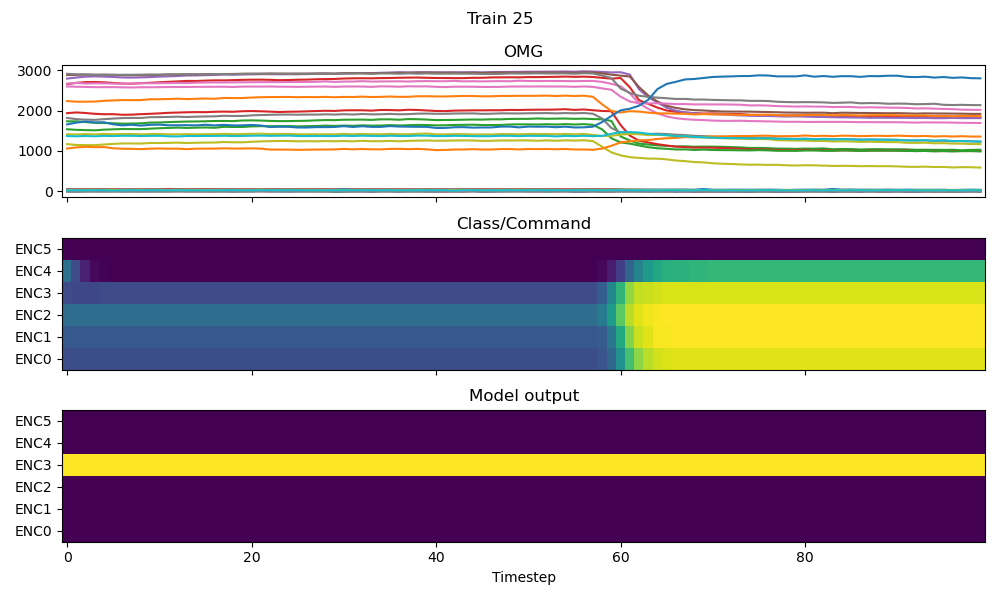

In [19]:
i = 25

fig, axx = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

axx[0].plot(X_train_nn[i])
axx[0].set_title('OMG')

axx[1].imshow(y_train_nn[i].T, origin="lower")
axx[1].set_aspect('auto')
axx[1].set_title('Class/Command')
axx[1].set_yticks(np.arange(6), GLOVE_CH)

axx[2].imshow(y_pred_train_nn[i].T, origin="lower") # , vmin=-0.5, vmax=0.5
axx[2].set_aspect('auto')
axx[2].set_title('Model output')
axx[2].set_yticks(np.arange(6), GLOVE_CH)
axx[2].set_xlabel('Timestep')

plt.suptitle(f'Train {i}')
plt.tight_layout()

## Prediction

In [20]:
y_pred_train = model.predict(gestures[OMG_CH].values[None, :])[0] * 100
y_pred_train = pd.DataFrame(y_pred_train, columns=GLOVE_CH, index=gestures['ts'])

1/1 [==============================] - 1s 521ms/step


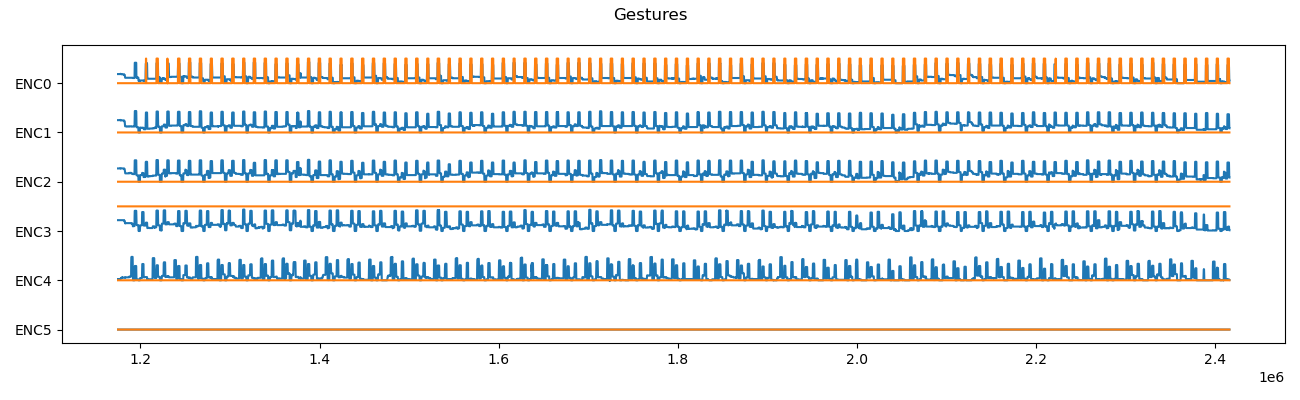

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(13, 4))

plt.sca(axes)
lines = []
labels = []
yticks = -np.arange(len(GLOVE_CH)) * 200

p = plt.plot(gestures['ts'].values, gestures[GLOVE_CH].values + yticks, c='C0')

p = plt.plot(gestures['ts'].values, y_pred_train.values + yticks, c='C1', linestyle='-')

plt.yticks(yticks, GLOVE_CH)
plt.suptitle(f'Gestures')
plt.tight_layout()

## Metrics

In [22]:
from sklearn.metrics import mean_squared_error as mse

metrics_train = {col : mse(gestures[col], y_pred_train[col]) for col in GLOVE_CH}
metrics_train = pd.Series(metrics_train)

print('Train')
display(metrics_train)

Train


ENC0     435.618419
ENC1    1441.824036
ENC2    1753.614624
ENC3    5866.766312
ENC4    1224.634618
ENC5       0.000000
dtype: float64

# Model for inference (stateful, one-timestep) 

In [23]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 50)]        0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 100)         15100     
                                                                 
 time_distributed (TimeDistr  (None, None, 6)          606       
 ibuted)                                                         
                                                                 
Total params: 15,706
Trainable params: 15,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_input = tf.keras.Input(batch_shape=(1, 1, n_channels))
x = tf.keras.layers.SimpleRNN(
    hidden_size,
    activation='relu',
    return_sequences=True,
    # return_state=True,
    # last state for each sample at index i in a batch will be used 
    # as initial state for the sample of index i in the following batch
    stateful=True,
    # speed-up a RNN, but more memory-intensive.
    # only suitable for short sequences.
    unroll=True
)(model_input)

model_output = tf.keras.layers.TimeDistributed(
    tf.keras.layers.Dense(output_units, activation='sigmoid')
)(x)


model_stateful = tf.keras.Model(
    inputs=[model_input],
    outputs=[model_output],
    name='model_stateful'
)

model_stateful.set_weights(model.get_weights())
print(model_stateful.summary())


Model: "model_stateful"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(1, 1, 50)]              0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (1, 1, 100)               15100     
                                                                 
 time_distributed_1 (TimeDis  (1, 1, 6)                606       
 tributed)                                                       
                                                                 
Total params: 15,706
Trainable params: 15,706
Non-trainable params: 0
_________________________________________________________________
None


## Architecture check

In [25]:
import time

In [26]:
np.set_printoptions(suppress=True, precision=8)

In [35]:
# toy-data
check_data = np.array([[i] * n_channels for i in range(1, 111)], dtype=float)
# real data
check_data = X_train[:10000]#.copy()
check_data = np.expand_dims(check_data, 0)
len_check_data = check_data.shape[1]

print(len_check_data, check_data.shape)
check_data[:, :3]

10000 (1, 10000, 50)


array([[[  10,    8,   29, 2846, 2929, 2873, 2598,   24,    8,    6,
           11,   48, 1813, 1951,   46,   36, 2534, 2832,   28,    6,
           30, 2434, 1526,   43,   10,    7,   38, 2004, 1189,   18,
         1573, 1121,   29,   14,    6,    4,   10,   53, 1593, 1434,
           33,   31,   11,   12,    8,    5,    8,   15,   36,   33],
        [  10,    8,   28, 2846, 2931, 2873, 2597,   24,    8,   13,
           12,   48, 1812, 1950,   46,   35, 2533, 2830,   27,    5,
           42, 2443, 1535,   49,   11,    7,   40, 2013, 1208,   18,
         1588, 1129,   32,   13,    6,    5,   17,   57, 1601, 1442,
           32,   28,   10,   11,    8,    5,    8,   13,   32,   25],
        [  16,    8,   29, 2847, 2930, 2875, 2598,   24,    8,    6,
           11,   48, 1815, 1950,   46,   34, 2534, 2821,   28,    6,
           44, 2444, 1536,   48,   10,    8,   40, 2013, 1197,   18,
         1587, 1129,   32,   13,    5,    5,   11,   57, 1602, 1440,
           33,   31,   10,   12,

In [36]:
y_pred = model.predict(check_data)
print(y_pred.shape)
# y_pred[:, :10]

1/1 [==============================] - 0s 129ms/step
(1, 10000, 6)


In [37]:
%%time

model_stateful.reset_states()

y_pred_stateful = []

time_start = time.time()

for i in range(check_data.shape[1]):
    embedding_stateful = model_stateful(check_data[:, [i]], training=False)
    y_pred_stateful.append(embedding_stateful.numpy())
    
time_end = time.time()
ts = (time_end - time_start) / len_check_data
    
y_pred_stateful = np.hstack(y_pred_stateful)

print(f"Avg time of {len_check_data} iters: {ts:.4f}")
print(y_pred_stateful.shape)
# y_pred_stateful[:, :10]

Avg time of 10000 iters: 0.0021
(1, 10000, 6)
CPU times: user 21.2 s, sys: 6.12 ms, total: 21.2 s
Wall time: 21.3 s


In [38]:
# CHECK equality of predictions
# ALL
print(np.allclose(y_pred, y_pred_stateful, atol=0.000001))

# EACH ONE
np.isclose(y_pred, y_pred_stateful).sum() / np.prod(y_pred_stateful.shape)

True


0.99995

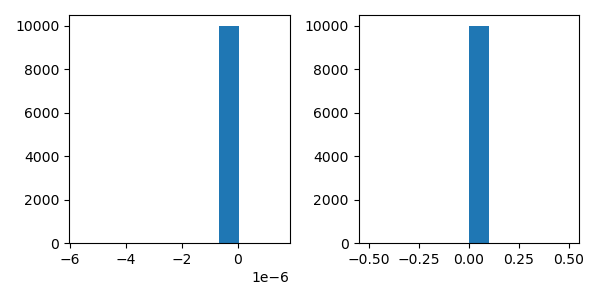

In [39]:
y_pred_diff = y_pred - y_pred_stateful

fig, axx = plt.subplots(1, 2, figsize=(6, 3))

plt.sca(axx[0])
plt.hist(y_pred_diff[0, :, 0])
plt.sca(axx[1])
plt.hist(y_pred_diff[0, :, 1])

plt.tight_layout()

# Real-time inference

In [40]:
import time
import serial
from IPython.display import clear_output

In [41]:
crc_table = [
    54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
    111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
    113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
    179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
    115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
    88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
    97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
    45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
    153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
    114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
    215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
    0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
    18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
    57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
    193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
    213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
    137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
    67, 112, 109, 78, 114, 165, 244, 183, 121
];
    
def get_crc(data, count):
    result = 0x00
    l = count
    while (count>0):   
        result = crc_table[result ^ data[l-count]]
        count -= 1;
    return result;

def drv_abs_one(ser, control):
    if ser is None:
        return
    pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
    pack[-1] = get_crc(pack[1:], 9)
    return (pack, ser.write(bytearray(pack)))

## Inference Utils: Put your code here

In [42]:
def preprocessing(x):
    # x - sample vector
    y = x
    return y

def inference(x):
    # instead of:
    # y = model.predict([x])[0]
    # use:
    y = model_stateful(x.reshape(1,1,-1)).numpy()[0][0]
    return y

def postprocessing(x, prev):
    if prev is None:
        y = x
    else:
        y = x*0.1 + prev*0.9 # Holt-Winters filter
    return y

def commands(x):
    y = np.round(np.clip(x, 0, 1)*100).astype(int)
    return y

## Inference

### Offline (dataset)

In [43]:
df_sim = gestures.copy().iloc[:10000]
# df_sim = free_movements.iloc[:10000]
print(df_sim.shape)

(10000, 65)


In [44]:
TIMEOUT = 0.033
DEBUG = False
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
y_dct = {
    'omg_sample':[],
    'enc_sample':[],
    'sample_preprocessed':[],
    
    'y_predicted':[],
    'y_postprocessed':[],
    'y_commands':[],
}
while True:    
    
    # [Data reading]
    ts_start = time.time()
    
    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]
    
    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    y_dct['enc_sample'].append(enc_sample)
    y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    y_dct['y_commands'].append(y_commands)
    # [/Data logging]

    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

In [45]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")

omg_sample.shape = (10000, 50)
enc_sample.shape = (10000, 6)
sample_preprocessed.shape = (10000, 50)
y_predicted.shape = (10000, 6)
y_postprocessed.shape = (10000, 6)
y_commands.shape = (10000, 6)


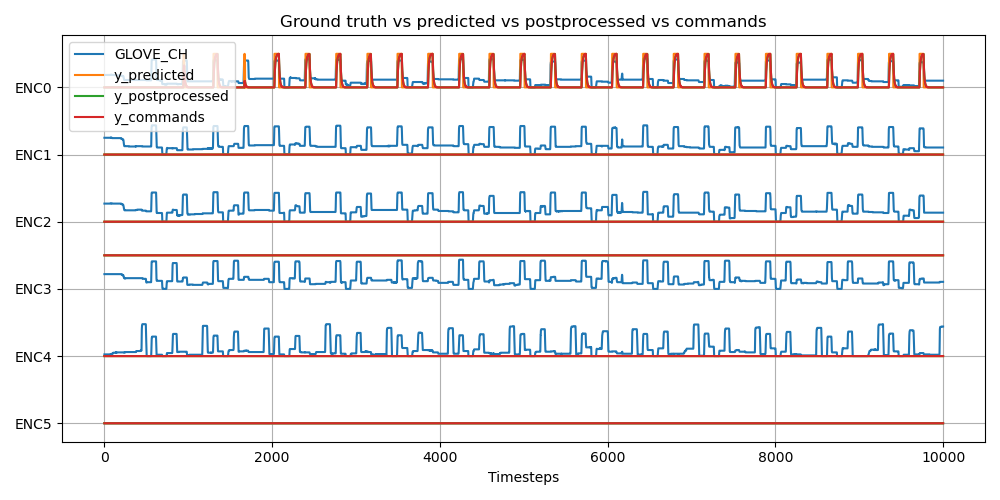

In [46]:
fig = plt.figure(figsize=(10, 5))

lines = []
labels = []

plots = plt.plot(df_sim[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200, c='C0')
lines += [plots[0]]
labels += ['GLOVE_CH']

plots = plt.plot(y_dct['y_predicted'] * 100 - np.arange(len(GLOVE_CH)) * 200, c='C1')
lines += [plots[0]]
labels += ['y_predicted']

plots = plt.plot(y_dct['y_postprocessed'] * 100 - np.arange(len(GLOVE_CH)) * 200, c='C2')
lines += [plots[0]]
labels += ['y_postprocessed']

plots = plt.plot(y_dct['y_commands'] - np.arange(len(GLOVE_CH)) * 200, c='C3')
lines += [plots[0]]
labels += ['y_commands']

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.legend(lines, labels)
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

### Online (prosthesis or virtual hand)

In [ ]:
TIMEOUT = 0.033
DEBUG = True

ser = None
# ser_port = None
# ser_port = '/dev/ttyACM0'
ser_port = '/dev/cu.usbmodem3498365F31351'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, timeout=2*TIMEOUT)
    ser.write('T1#\r\n'.encode('utf-8')) # T1 for Timestamp activate
    ser.write('M2#\r\n'.encode('utf-8')) # M2 for Mode == 2 = send samples
    ser.write('S2#\r\n'.encode('utf-8')) # SYNC to 2 for sanity check

    # flush buffers
    ser.reset_input_buffer()
    ser.read()
    
    i = 0;
    while(ser.in_waiting):
        print(f'Flushing buffers {i}: {ser.in_waiting}', end='    \r')
        ser.read_all()
        time.sleep(0.005)
        i+=1;
    ser.readline()
    ser.readline()
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
while True:    
    
    # [Data reading]
    s = ser.readline()
    ts_start = time.time()
    
    try:
        sample = np.array(s.decode('UTF-8')\
                           .replace('\r\n', "")\
                           .split(' ')
                         ).astype(int)
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    pack, _ = drv_abs_one(ser, list(y_commands)); # + [0]
    # [/Commands sending]
    
    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: iteration should increase monotonically, TIMEDIFF approximately 32-34 ms, CYCLETIME < TIMEOUT, WAITING should be == 0
        print(f'ITERATION:\t{i}\tTIMEDIFF:\t{(ts_start - ts_old)*1000: .0f}\tCYCLETIME:\t{ts_diff*1000:.0f}\tWAITING:\t{ser.in_waiting}')
        print('INPUT:\n', s)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
        print(pack)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 